In [25]:
import anndata
import scanpy as sc
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from abc_atlas_access.abc_atlas_cache.abc_project_cache import AbcProjectCache

In [2]:
expr_path = '/data/scRNA/ABCA/AIBS/AWS/expression_matrices/WMB-10Xv3/20230630/processed/WMB-10Xv3-CTXsp-log2-wmeta.h5ad'
# expr_path = '/data/scRNA/ABCA/AIBS/AWS/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-Isocortex-1-log2-wmeta.h5ad'
adata = sc.read_h5ad(expr_path)
adata

AnnData object with n_obs × n_vars = 78223 × 32285
    obs: 'cell_barcode', 'barcoded_cell_sample_label', 'library_label', 'feature_matrix_label', 'entity', 'brain_section_label', 'library_method', 'region_of_interest_acronym', 'donor_label', 'donor_genotype', 'donor_sex', 'dataset_label', 'x', 'y', 'cluster_alias', 'neurotransmitter', 'class', 'subclass', 'supertype', 'cluster', 'neurotransmitter_color', 'class_color', 'subclass_color', 'supertype_color', 'cluster_color', 'region_of_interest_order', 'region_of_interest_color'
    var: 'gene_symbol'
    uns: 'normalization', 'parent', 'parent_layer', 'parent_rows'

In [3]:
adata.obs.head()

,cell_barcode,barcoded_cell_sample_label,library_label,feature_matrix_label,entity,brain_section_label,library_method,region_of_interest_acronym,donor_label,donor_genotype,...,subclass,supertype,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color,region_of_interest_order,region_of_interest_color
cell_label,,,,,,,,,,,,,,,,,,,,,
GCCCGAAGTCAGTTTG-344_C04,GCCCGAAGTCAGTTTG,344_C04,L8TX_200827_01_E10,WMB-10Xv3-CTXsp,cell,NaN,10Xv3,CTXsp,Snap25-IRES2-Cre;Ai14-539605,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,079 CEA-BST Six3 Cyp26b1 Gaba,0367 CEA-BST Six3 Cyp26b1 Gaba_1,1327 CEA-BST Six3 Cyp26b1 Gaba_1,#FF3358,#450099,#73C1FF,#660F30,#FFED73,17,#994817
AGGTTACTCGCGCCAA-332_B01,AGGTTACTCGCGCCAA,332_B01,L8TX_200820_01_D01,WMB-10Xv3-CTXsp,cell,NaN,10Xv3,CTXsp,Snap25-IRES2-Cre;Ai14-537272,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,079 CEA-BST Six3 Cyp26b1 Gaba,0367 CEA-BST Six3 Cyp26b1 Gaba_1,1330 CEA-BST Six3 Cyp26b1 Gaba_1,#FF3358,#450099,#73C1FF,#660F30,#814DFF,17,#994817
ATGAGGGAGTGTTCCA-332_A01,ATGAGGGAGTGTTCCA,332_A01,L8TX_200820_01_E02,WMB-10Xv3-CTXsp,cell,NaN,10Xv3,CTXsp,Snap25-IRES2-Cre;Ai14-537272,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,080 CEA-AAA-BST Six3 Sp9 Gaba,0374 CEA-AAA-BST Six3 Sp9 Gaba_2,1358 CEA-AAA-BST Six3 Sp9 Gaba_2,#FF3358,#450099,#990091,#57662E,#662E4F,17,#994817
CATAGACAGTCTAACC-299_B02,CATAGACAGTCTAACC,299_B02,L8TX_200723_01_G09,WMB-10Xv3-CTXsp,cell,NaN,10Xv3,CTXsp,Snap25-IRES2-Cre;Ai14-532618,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,080 CEA-AAA-BST Six3 Sp9 Gaba,0374 CEA-AAA-BST Six3 Sp9 Gaba_2,1358 CEA-AAA-BST Six3 Sp9 Gaba_2,#FF3358,#450099,#990091,#57662E,#662E4F,17,#994817
GAGTTACCATGACGAG-299_A02,GAGTTACCATGACGAG,299_A02,L8TX_200723_01_F09,WMB-10Xv3-CTXsp,cell,NaN,10Xv3,CTXsp,Snap25-IRES2-Cre;Ai14-532618,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,080 CEA-AAA-BST Six3 Sp9 Gaba,0374 CEA-AAA-BST Six3 Sp9 Gaba_2,1358 CEA-AAA-BST Six3 Sp9 Gaba_2,#FF3358,#450099,#990091,#57662E,#662E4F,17,#994817


In [4]:
def print_column_info(df):
    for c in df.columns:
        # Explicitly set observed=False to retain current behavior and suppress the warning
        grouped = df[[c]].groupby(c, observed=False).count()
        members = ''
        if len(grouped) < 30:
            members = str(list(grouped.index))
        print(f"Number of unique {c} = {len(grouped)} {members}")


In [5]:
print_column_info(adata.obs)

Number of unique cell_barcode = 77430 
Number of unique barcoded_cell_sample_label = 15 ['299_A02', '299_B02', '308_A03', '308_B03', '308_C03', '323_A02', '332_A01', '332_B01', '332_C01', '341_A01', '341_B01', '341_C01', '344_A04', '344_B04', '344_C04']
Number of unique library_label = 15 ['L8TX_200723_01_F09', 'L8TX_200723_01_G09', 'L8TX_200730_01_B02', 'L8TX_200730_01_G02', 'L8TX_200730_01_H12', 'L8TX_200813_01_D10', 'L8TX_200820_01_D01', 'L8TX_200820_01_E02', 'L8TX_200820_01_E08', 'L8TX_200827_01_B09', 'L8TX_200827_01_E09', 'L8TX_200827_01_E10', 'L8TX_200827_01_F09', 'L8TX_200827_01_G08', 'L8TX_200827_01_H08']
Number of unique feature_matrix_label = 1 ['WMB-10Xv3-CTXsp']
Number of unique entity = 1 ['cell']
Number of unique brain_section_label = 0 []
Number of unique library_method = 1 ['10Xv3']
Number of unique region_of_interest_acronym = 1 ['CTXsp']
Number of unique donor_label = 6 ['Snap25-IRES2-Cre;Ai14-532618', 'Snap25-IRES2-Cre;Ai14-533254', 'Snap25-IRES2-Cre;Ai14-536273', 'S

In [6]:
def plot_umap(xx, yy, cc=None, val=None, fig_width=8, fig_height=8, cmap=None):

    fig, ax = plt.subplots()
    fig.set_size_inches(fig_width, fig_height)
    
    if cmap is not None :
        plt.scatter(xx, yy, s=0.5, c=val, marker='.', cmap=cmap)
    elif cc is not None :
        plt.scatter(xx, yy, s=0.5, color=cc, marker='.')
        
    ax.axis('equal')
    ax.set_xlim(-18, 27)
    ax.set_ylim(-18, 27)
    ax.set_xticks([])
    ax.set_yticks([])
    
    return fig, ax

In [44]:
from matplotlib.lines import Line2D
def plot_umap_legends(xx, yy, cc=None, val=None, label_column=None, fig_width=8, fig_height=8, cmap=None):
    # Initialize plot with constrained layout to prevent overlap
    fig, ax = plt.subplots(constrained_layout=True)
    fig.set_size_inches(fig_width, fig_height)
    
    # Plot the data
    if cmap is not None:
        scatter = ax.scatter(xx, yy, s=0.5, c=val, marker='.', cmap=cmap)
    elif cc is not None:
        scatter = ax.scatter(xx, yy, s=0.5, color=cc, marker='.')
    else:
        scatter = ax.scatter(xx, yy, s=0.5, marker='.')
    
    # Set axis properties
    ax.axis('equal')
    ax.set_xlim(-18, 27)
    ax.set_ylim(-18, 27)
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Add legend if label_column is provided
    if label_column is not None:
        # Create DataFrame for unique label-color pairs
        df_legend = pd.DataFrame({'label': label_column, 'color': cc}).drop_duplicates().sort_values('label')
        
        # Create legend handles
        legend_elements = [
            Line2D([0], [0], 
                   marker='o', 
                   color='w', 
                   label=row['label'],
                   markerfacecolor=row['color'], 
                   markersize=8)
            for _, row in df_legend.iterrows()
        ]
        
        # Add legend outside the plot (adjust bbox_to_anchor as needed)
        ax.legend(
            handles=legend_elements, 
            title="Legend", 
            loc="upper left",  # Anchor point for the legend
            bbox_to_anchor=(1.05, 1)  # Shift legend to the right of the plot
        )
    
    return fig, ax

In [7]:
cell_subsampled = adata.obs
print(len(cell_subsampled))

78223


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


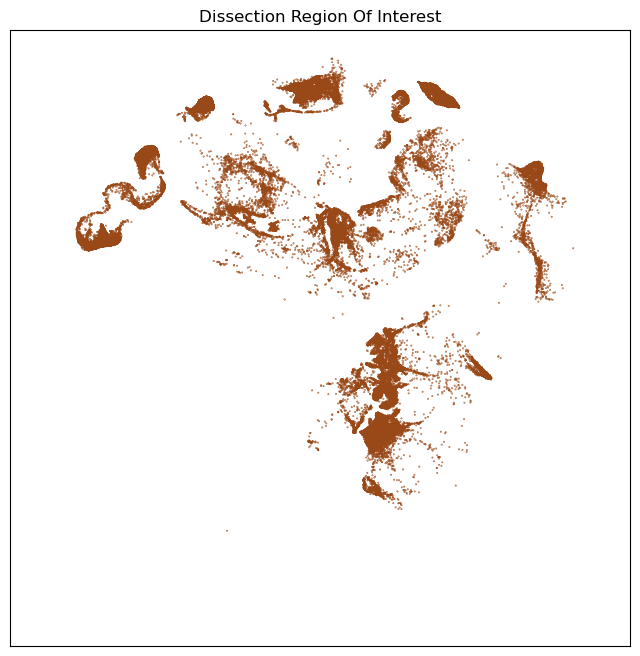

In [36]:
fig, ax = plot_umap(
    cell_subsampled['x'],
    cell_subsampled['y'],
    cc = cell_subsampled['region_of_interest_color'])
res = ax.set_title("Dissection Region Of Interest")
plt.show()

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


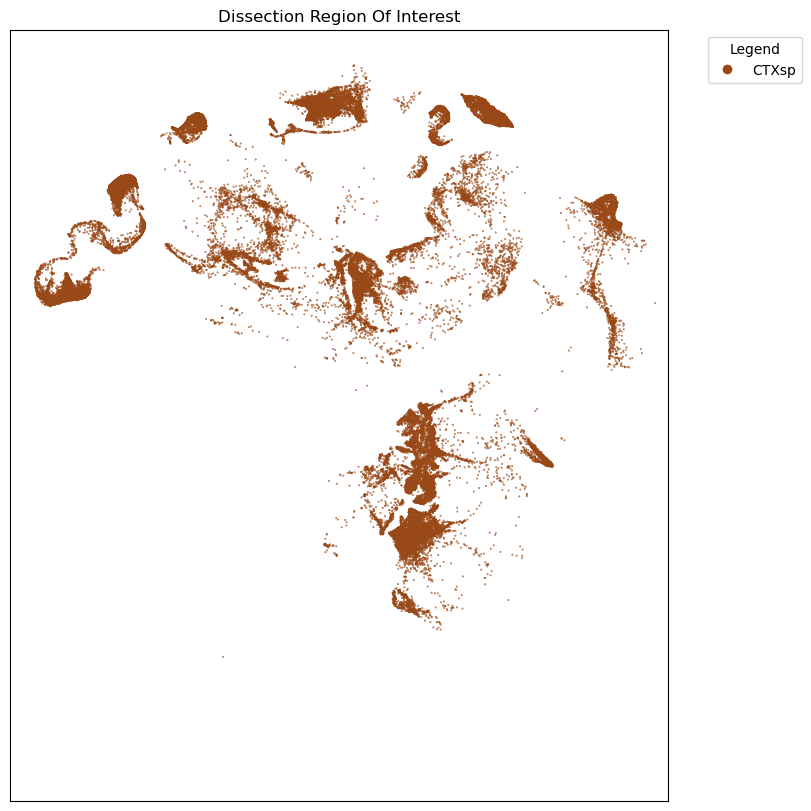

In [45]:
fig, ax = plot_umap_legends(
    cell_subsampled['x'],
    cell_subsampled['y'],
    label_column = cell_subsampled['region_of_interest_acronym'],
    cc = cell_subsampled['region_of_interest_color'])
res = ax.set_title("Dissection Region Of Interest")
plt.show()

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


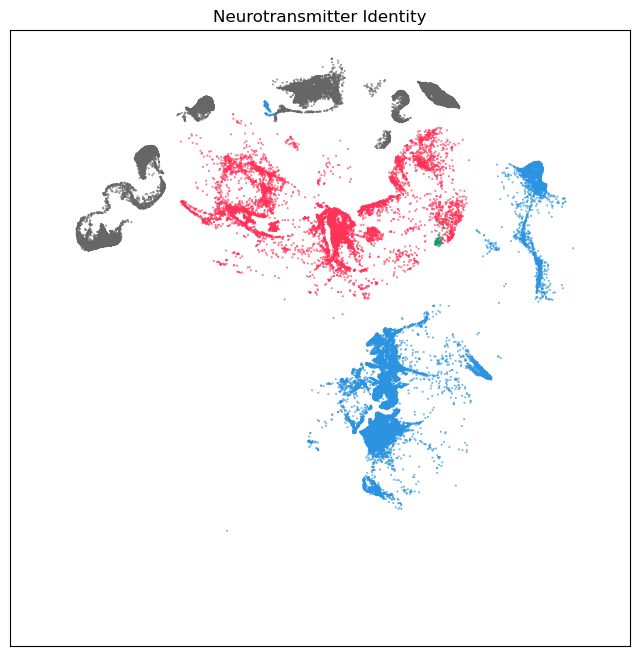

In [38]:
fig, ax = plot_umap(
    cell_subsampled['x'],
    cell_subsampled['y'],
    cc = cell_subsampled['neurotransmitter_color'])
res = ax.set_title("Neurotransmitter Identity")
plt.show()

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


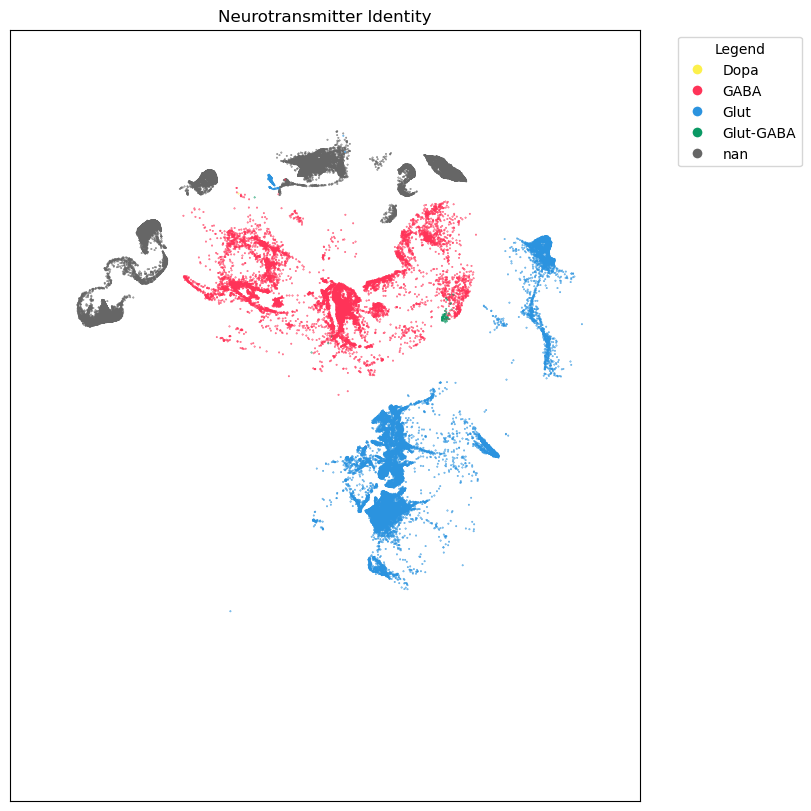

In [46]:
fig, ax = plot_umap_legends(
    cell_subsampled['x'],
    cell_subsampled['y'],
    label_column = cell_subsampled['neurotransmitter'],
    cc = cell_subsampled['neurotransmitter_color'])
res = ax.set_title("Neurotransmitter Identity")
plt.show()

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


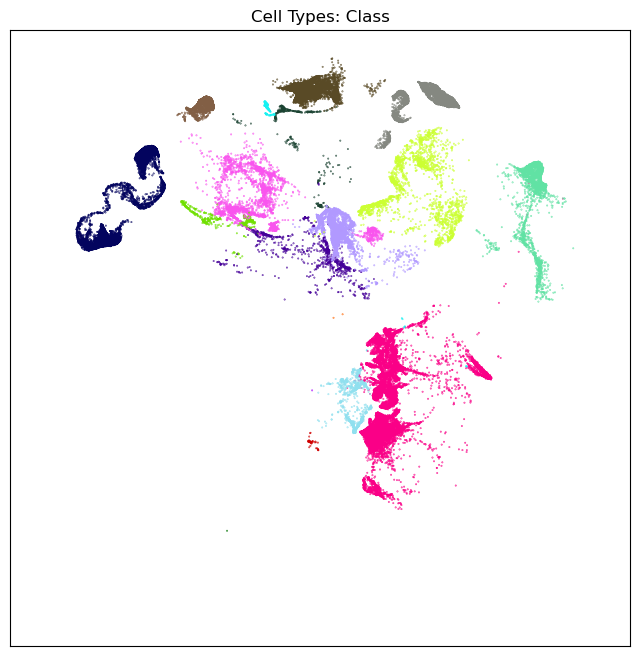

In [13]:
fig, ax = plot_umap(
    cell_subsampled['x'],
    cell_subsampled['y'],
    cc = cell_subsampled['class_color'])
res = ax.set_title("Cell Types: Class")
plt.show()

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


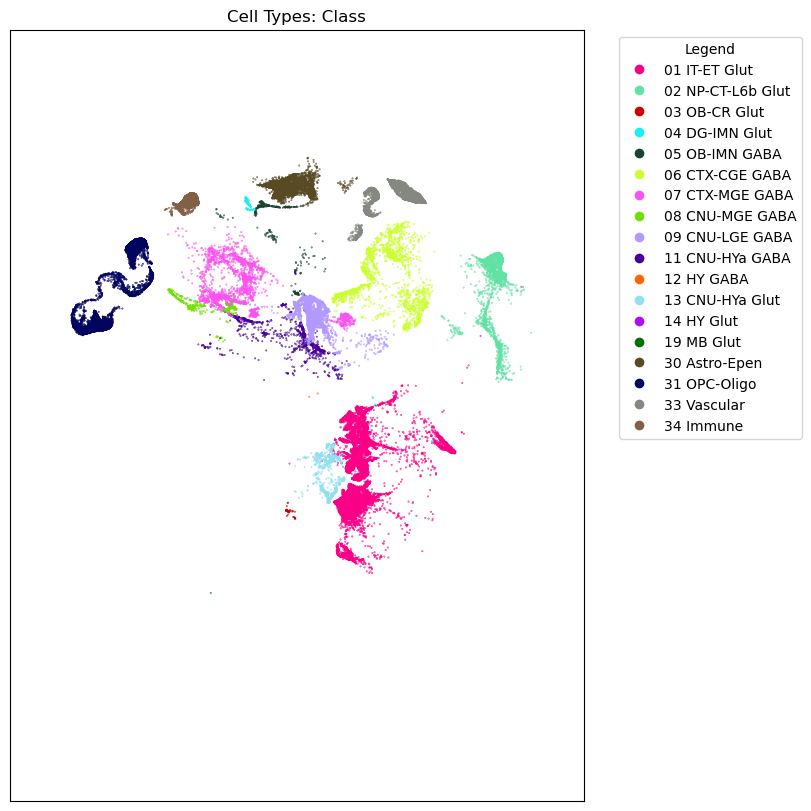

In [47]:
fig, ax = plot_umap_legends(
    cell_subsampled['x'],
    cell_subsampled['y'],
    label_column = cell_subsampled['class'],
    cc = cell_subsampled['class_color'])
res = ax.set_title("Cell Types: Class")
plt.show()

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


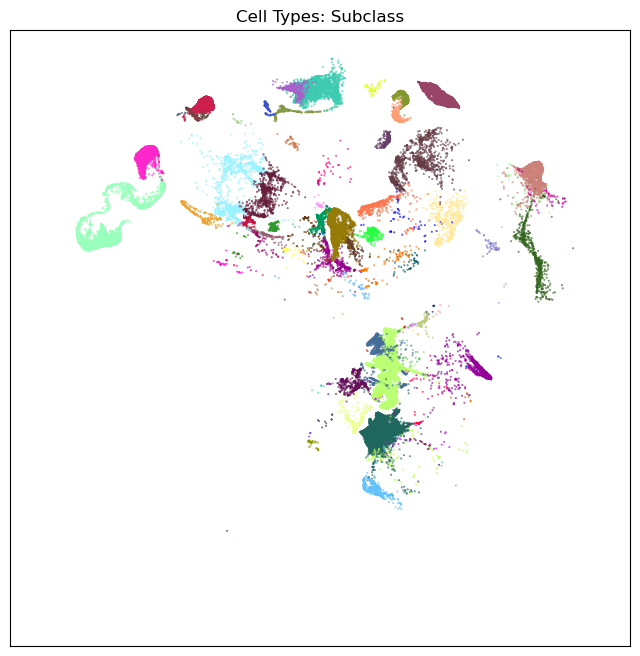

In [15]:
fig, ax = plot_umap(cell_subsampled['x'], cell_subsampled['y'], cc=cell_subsampled['subclass_color'])
res = ax.set_title("Cell Types: Subclass")
plt.show()

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
/home/momo/miniforge3/envs/abca-env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


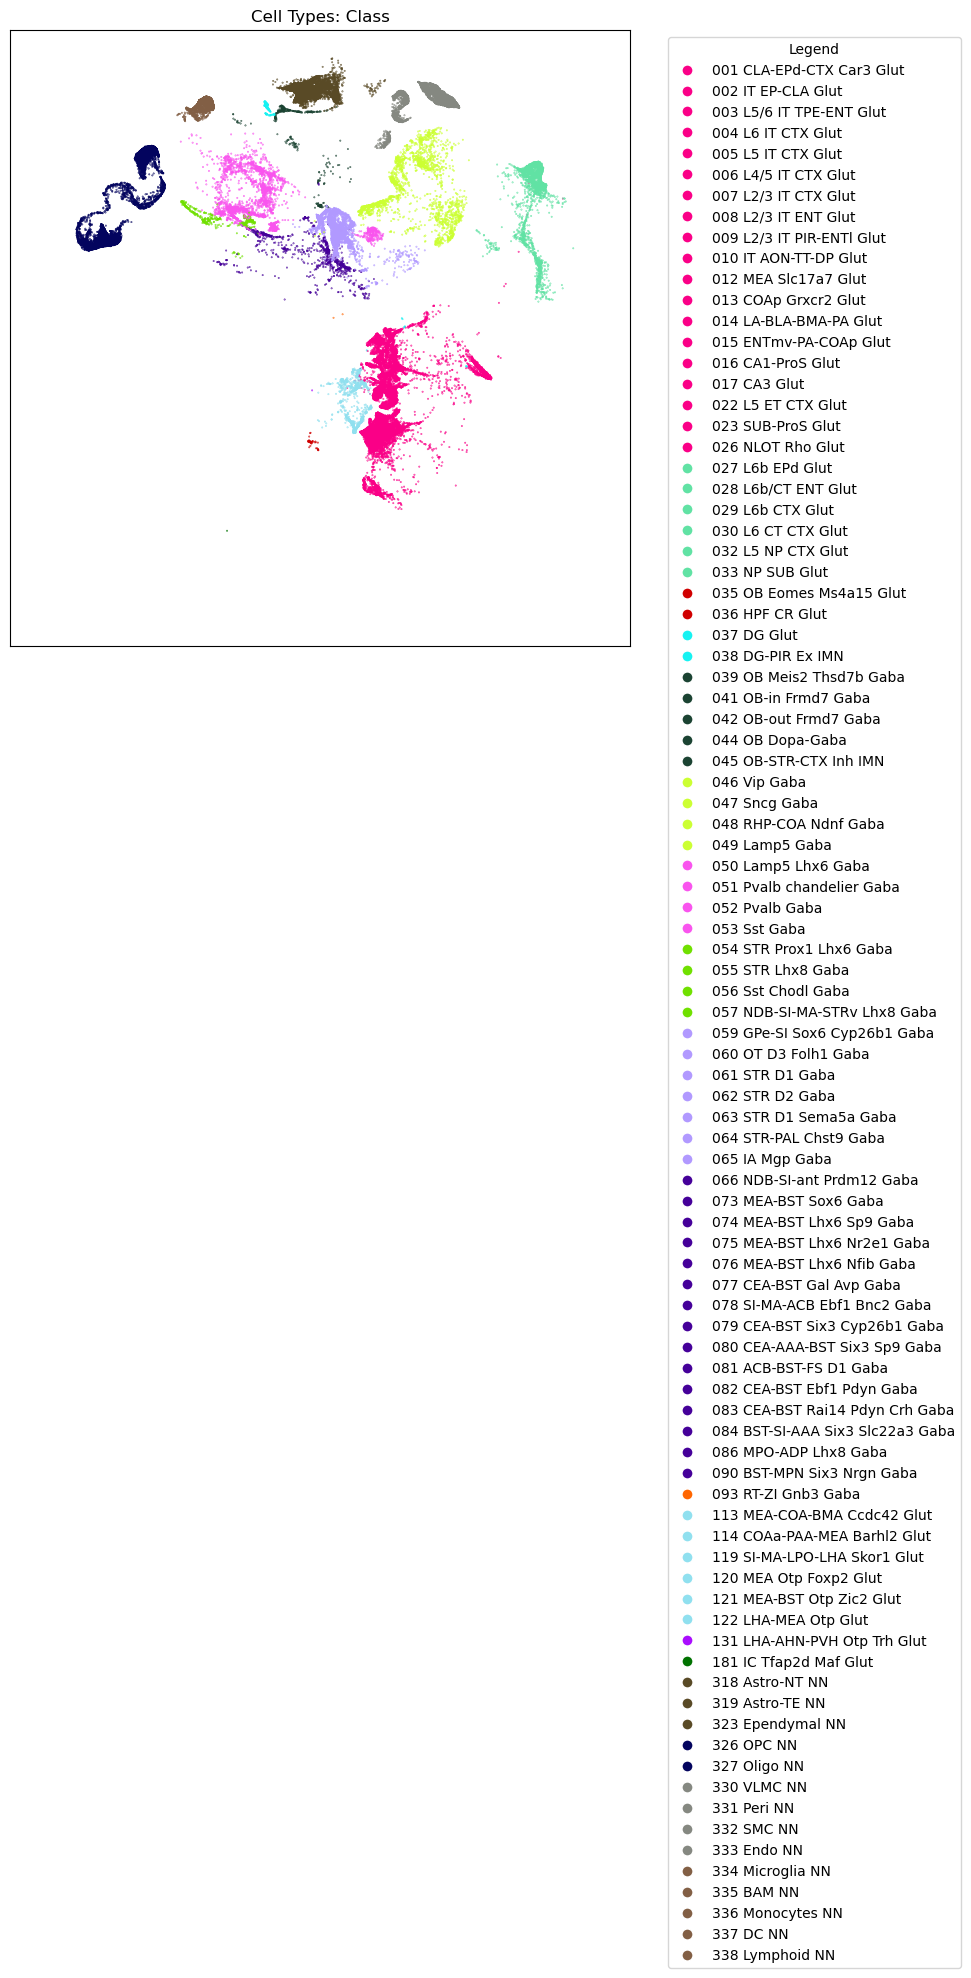

In [48]:
fig, ax = plot_umap_legends(
    cell_subsampled['x'],
    cell_subsampled['y'],
    label_column = cell_subsampled['subclass'],
    cc = cell_subsampled['class_color'])
res = ax.set_title("Cell Types: Class")
plt.show()